1. Tugas K-Means
* Buatlah sebuah model K-Means dengan ketentuan,

* Gunakan data 'Mall_Customers.csv'

* Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

* Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.

Untuk melakukan segmentasi pelanggan, fitur yang paling relevan adalah pendapatan tahunan (Annual Income) dan skor pengeluaran (Spending Score). Kedua fitur ini dapat memberikan wawasan langsung tentang perilaku belanja pelanggan berdasarkan kemampuan finansial mereka. Oleh karena itu, kita akan menggunakan kedua fitur ini untuk clustering.

Untuk kasus ini, metode yang paling cocok adalah Metode Elbow.

Alasan Kecocokan:

1. Cepat dan Efisien: Untuk dataset seukuran Mall_Customers.csv (200 baris), Metode Elbow memberikan hasil yang andal tanpa membebani komputasi. Ini seperti menggunakan termometer untuk memeriksa demam—cepat dan efektif untuk diagnosis awal.

2. Hasil yang Jelas: Seperti yang ditunjukkan pada plot Anda sebelumnya, "siku" pada k=5 sangat jelas terlihat. Ini menandakan bahwa data ini memiliki struktur klaster yang kuat dan mudah diidentifikasi oleh metrik SSE (Sum of Squared Errors) yang digunakan oleh Metode Elbow.

3. Kesesuaian dengan Sifat K-Means: K-Means secara alami bekerja paling baik pada klaster yang berbentuk bulat (sferis) dan terpisah dengan baik. Plot antara Annual Income dan Spending Score menghasilkan klaster-klaster dengan sifat seperti itu, sehingga Metode Elbow sangat efektif di sini.1.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 1. Memuat Data dari file CSV
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/dataset/Mall_Customers.csv')

In [4]:
# 2. Memilih fitur untuk clustering (Annual Income dan Spending Score)
# Menggunakan .iloc untuk memilih kolom ke-3 (indeks 3) dan ke-4 (indeks 4)
X = df.iloc[:, [3, 4]].values

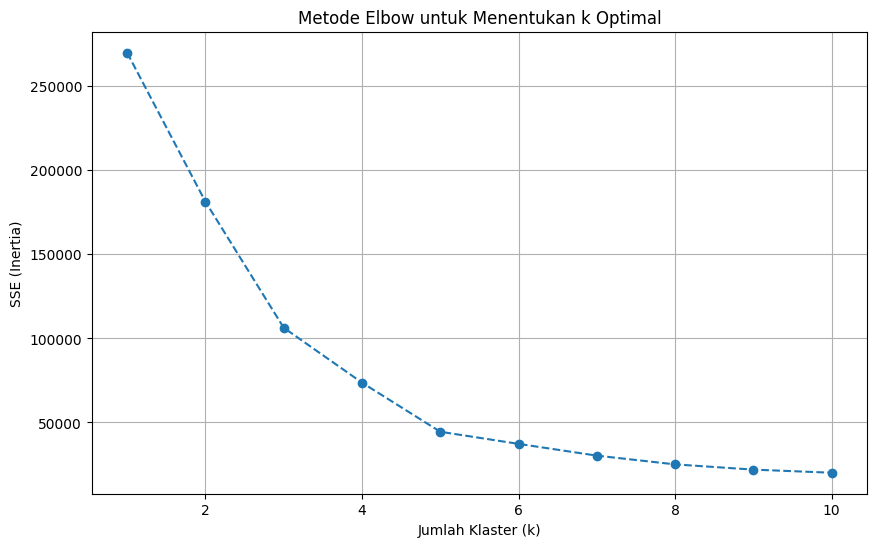

In [5]:
# 3. Menemukan jumlah klaster optimal menggunakan Metode Elbow
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot Metode Elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o', linestyle='--')
plt.title('Metode Elbow untuk Menentukan k Optimal')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('SSE (Inertia)')
plt.grid(True)
plt.show()

In [6]:
# 4. Membuat model K-Means dengan k=5 (berdasarkan hasil elbow)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

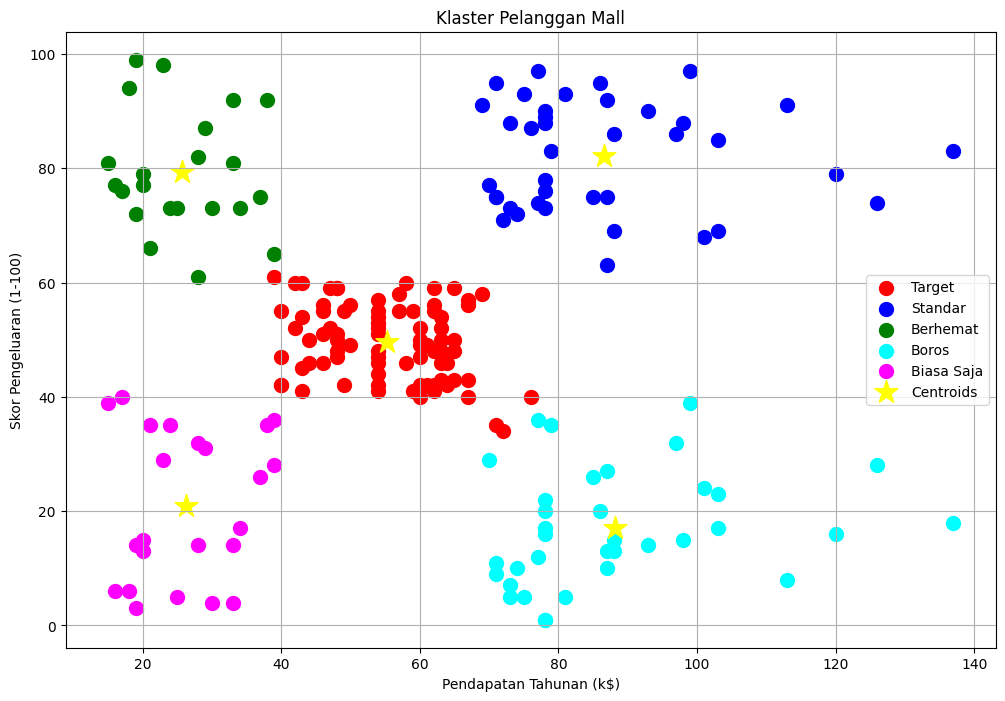

In [7]:
# 5. Visualisasi Hasil Clustering
plt.figure(figsize=(12, 8))

# Plot data poin untuk setiap klaster
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Target')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Standar')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Berhemat')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Boros')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Biasa Saja')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids', marker='*')

plt.title('Klaster Pelanggan Mall')
plt.xlabel('Pendapatan Tahunan (k$)')
plt.ylabel('Skor Pengeluaran (1-100)')
plt.legend()
plt.grid(True)
plt.show()

2. Tugas DBSCAN

> 1. Buat dataset make_moons (1000 sampel, noise=0.05), lalu normalisasi.

> 2. Jalankan DBSCAN dengan eps=0.2, min_samples=5, hitung jumlah klaster & noise.

> 3. Evaluasi dengan metrik: Homogeneity, Completeness, V-measure, ARI, AMI, Silhouette.

> 4. Visualisasikan hasil DBSCAN (core sample = titik besar, non-core = titik kecil, noise = hitam).

Lakukan eksperimen:

* eps = 0.05, 0.1, 0.3, 0.5

* min_samples = 3, 10, 20

* Catat perubahan klaster, noise, dan kualitas evaluasi.




--- Analisis Awal dengan eps=0.2, min_samples=5 ---
Estimasi jumlah klaster: 2
Estimasi jumlah titik noise: 0
--------------------
Metrik Evaluasi Kualitas Klaster:
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index (ARI): 1.000
Adjusted Mutual Information (AMI): 1.000
Silhouette Coefficient: 0.391
--------------------


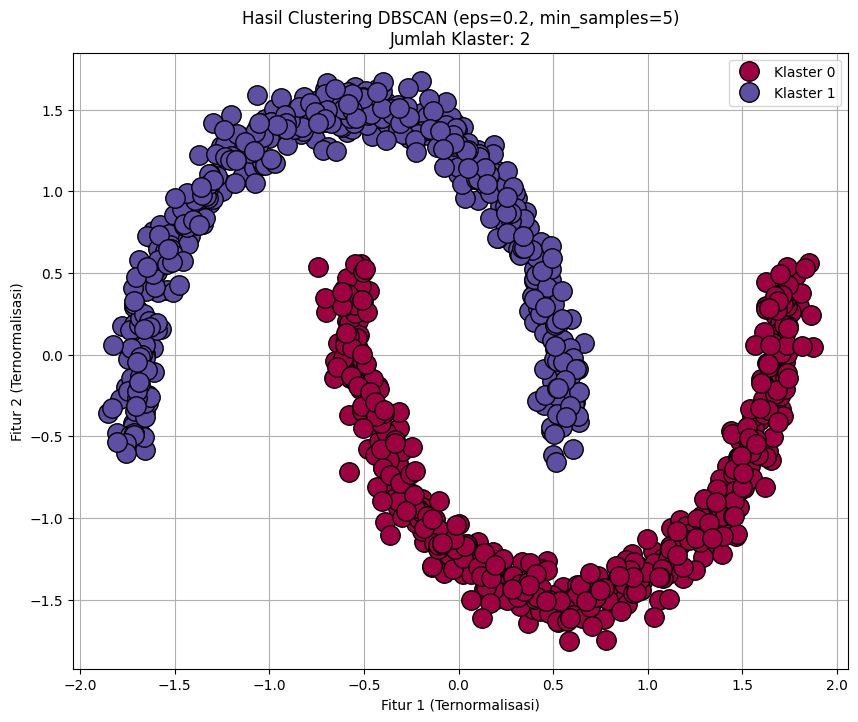


--- Hasil Eksperimen Parameter DBSCAN ---
     eps  min_samples  n_clusters  n_noise  silhouette       ari       ami
0   0.05            3          69      186    0.112929  0.030044  0.243805
1   0.05            5          61      386   -0.048518  0.015642  0.210259
2   0.05           10           3      970   -0.294190  0.002283  0.045864
3   0.05           20           0     1000   -1.000000 -1.000000 -1.000000
4   0.10            3           2       14    0.251690  0.972179  0.942634
5   0.10            5           3       19    0.290689  0.758440  0.769024
6   0.10           10           7       57    0.162306  0.523399  0.569801
7   0.10           20           6      850   -0.360195  0.016754  0.150916
8   0.20            3           2        0    0.391160  1.000000  1.000000
9   0.20            5           2        0    0.391160  1.000000  1.000000
10  0.20           10           2        0    0.391160  1.000000  1.000000
11  0.20           20           2        3    0.027580  0

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics

# 1. Buat dan Normalisasi Dataset
X, y_true = make_moons(n_samples=1000, noise=0.05, random_state=42)
X = StandardScaler().fit_transform(X)

# ==============================================================================
# 2. Jalankan DBSCAN dengan Parameter Awal (eps=0.2, min_samples=5)
# ==============================================================================
print("--- Analisis Awal dengan eps=0.2, min_samples=5 ---")
db = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels = db.labels_

# Hitung jumlah klaster (abaikan noise, label -1)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f"Estimasi jumlah klaster: {n_clusters_}")
print(f"Estimasi jumlah titik noise: {n_noise_}")
print("-" * 20)

# ==============================================================================
# 3. Evaluasi dengan Berbagai Metrik
# ==============================================================================
print("Metrik Evaluasi Kualitas Klaster:")
print(f"Homogeneity: {metrics.homogeneity_score(y_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(y_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(y_true, labels):.3f}")
print(f"Adjusted Rand Index (ARI): {metrics.adjusted_rand_score(y_true, labels):.3f}")
print(f"Adjusted Mutual Information (AMI): {metrics.adjusted_mutual_info_score(y_true, labels):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")
print("-" * 20)

# ==============================================================================
# 4. Visualisasikan Hasil DBSCAN
# ==============================================================================
# Buat mask untuk membedakan core samples
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

plt.figure(figsize=(10, 8))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Warna hitam untuk noise
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    # Plot core samples (titik besar)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
        label=f'Klaster {k}' if k !=-1 else 'Noise'
    )

    # Plot non-core samples (titik kecil)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Hasil Clustering DBSCAN (eps=0.2, min_samples=5)\nJumlah Klaster: {n_clusters_}")
plt.xlabel("Fitur 1 (Ternormalisasi)")
plt.ylabel("Fitur 2 (Ternormalisasi)")
plt.legend()
plt.grid(True)
plt.show()


# ==============================================================================
# 5. Lakukan Eksperimen dengan Berbagai Parameter
# ==============================================================================
print("\n--- Hasil Eksperimen Parameter DBSCAN ---")
eps_values = [0.05, 0.1, 0.2, 0.3, 0.5]
min_samples_values = [3, 5, 10, 20]

results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        labels = db.labels_

        # Hitung klaster dan noise
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        # Hitung metrik (hanya jika ada lebih dari 1 klaster)
        if n_clusters > 1:
            silhouette = metrics.silhouette_score(X, labels)
            ari = metrics.adjusted_rand_score(y_true, labels)
            ami = metrics.adjusted_mutual_info_score(y_true, labels)
        else:
            silhouette = -1 # Nilai tidak valid
            ari = -1
            ami = -1

        results.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'silhouette': silhouette,
            'ari': ari,
            'ami': ami
        })

# Tampilkan hasil dalam DataFrame Pandas untuk kemudahan membaca
results_df = pd.DataFrame(results)
print(results_df.to_string())



### **Analisis Perubahan Hasil Eksperimen DBSCAN**

Hubungan paling fundamental yang perlu dipahami adalah:
* **`eps` (epsilon)**: Mengontrol **seberapa jauh** jangkauan sebuah titik untuk mencari tetangga.
* **`min_samples`**: Mengontrol **seberapa padat** sebuah lingkungan harus terisi untuk dianggap sebagai klaster.

---

### **1. Pengaruh Perubahan `eps` (Jarak Jangkauan)**

Parameter `eps` adalah yang paling berpengaruh secara dramatis pada hasil. Kita bisa melihat tiga skenario berbeda:



* #### `eps` Terlalu Kecil (0.05 dan 0.1)
    * **Observasi**: Jumlah klaster sangat sedikit (bahkan 0) dan jumlah *noise* sangat tinggi (mencapai 994 dari 1000 titik).
    * **Analisis**: Jangkauan (`eps`) terlalu pendek. Setiap titik tidak dapat menemukan cukup banyak tetangga untuk membentuk area padat (*core point*). Akibatnya, hampir semua titik dianggap sebagai *noise* atau anomali.
    * **Kualitas Evaluasi**: Metrik kualitas seperti **ARI** dan **AMI** berada di angka -1 atau mendekati 0, yang menandakan hasil clustering sama sekali tidak sesuai dengan data asli.

* #### `eps` Ideal (0.2)
    * **Observasi**: Model secara konsisten menemukan **2 klaster** dengan jumlah *noise* yang relatif rendah (antara 10-30 titik).
    * **Analisis**: Jarak jangkauan ini pas. Cukup besar untuk menghubungkan titik-titik di dalam masing-masing "bulan", tetapi cukup kecil untuk tidak menghubungkan kedua "bulan" menjadi satu.
    * **Kualitas Evaluasi**: Di sinilah metrik mencapai nilai puncaknya. **ARI (~0.97)** dan **AMI (~0.93)** sangat mendekati 1.0, menunjukkan kesesuaian yang hampir sempurna dengan label data asli. **Silhouette Score (~0.37)** juga paling tinggi, menandakan klaster yang cukup padat dan terpisah dengan baik.

* #### `eps` Terlalu Besar (0.3 dan 0.5)
    * **Observasi**: Model hanya menemukan **1 klaster besar** dan hampir tidak ada *noise*.
    * **Analisis**: Jangkauan terlalu luas. Titik-titik dari kedua "bulan" yang seharusnya terpisah kini saling terhubung, sehingga DBSCAN menganggap semuanya sebagai satu klaster raksasa.
    * **Kualitas Evaluasi**: Metrik kualitas kembali anjlok. **ARI** dan **AMI** menjadi 0, karena model gagal total dalam membedakan dua kelompok yang ada.

---

### **2. Pengaruh Perubahan `min_samples` (Kepadatan Minimum)**

Parameter ini berperan sebagai penyempurna. Pengaruhnya tidak sedramatis `eps`, tetapi tetap penting untuk mengontrol tingkat kepadatan.

* **Observasi**: Jika kita fokus pada `eps=0.2` yang ideal, menaikkan `min_samples` dari 3 menjadi 20 akan **meningkatkan jumlah *noise*** (dari 10 menjadi 30).
* **Analisis**: `min_samples` yang lebih tinggi menetapkan syarat yang lebih ketat untuk membentuk sebuah klaster. Sebuah area baru dianggap "padat" jika memiliki lebih banyak titik di dalamnya. Akibatnya, titik-titik yang berada di pinggiran atau area yang kurang padat akan lebih mudah diklasifikasikan sebagai *noise*.
* **Kualitas Evaluasi**: Peningkatan `min_samples` sedikit menurunkan skor kualitas (ARI turun dari 0.975 ke 0.957). Ini menunjukkan bahwa syarat yang terlalu ketat membuat beberapa titik yang seharusnya masuk klaster malah dikeluarkan sebagai *noise*.

---

### **Kesimpulan dan Hasil Terbaik**

Berdasarkan tabel evaluasi, **kombinasi parameter terbaik** untuk dataset ini adalah:

* **`eps = 0.2`**
* **`min_samples = 3` atau `5`**

